<a href="https://colab.research.google.com/github/tamal-mallick/Customer_Churn_Data/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  !pip install vecstack

In [ ]:
from vecstack import stacking
import pandas as pd
import numpy as np
# import classifiers
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
# import various scoring methods 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score, recall_score, precision_score

from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# To upload our datasets from our working directory we need to mount our drive contents to the colab environment. 

from google.colab import drive
drive.mount('/gdrive')
#Change current working directory to gdrive
%cd /gdrive


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:


trainfile = r'/gdrive/My Drive/ASU_MSBA/CIS_508/Individual Assignment 6/Churn-Train-2.csv'
train_data = pd.read_csv(trainfile)

testfile = r'/gdrive/My Drive/ASU_MSBA/CIS_508/Individual Assignment 6/Churn-Test-2.csv'
test_data = pd.read_csv(testfile)




In [ ]:
print(train_data.shape)
print(train_data.head()) 

print(test_data.shape)
print(test_data.head())

(1165, 20)
  State  Account Length  Area Code  ... Intl Charge CustServ Calls  TARGET
0    KS             128        415  ...        2.70              1       0
1    OH             107        415  ...        3.70              1       0
2    NJ             137        415  ...        3.29              0       0
3    OH              84        408  ...        1.78              2       0
4    OK              75        415  ...        2.73              3       0

[5 rows x 20 columns]
(1261, 20)
  State  Account Length  Area Code  ... Intl Charge CustServ Calls  TARGET
0    VT              50        415  ...        2.16              0       0
1    UT              72        415  ...        3.29              3       0
2    KS             130        510  ...        3.48              1       0
3    NV             143        408  ...        2.05              1       0
4    DE              89        510  ...        1.46              1       0

[5 rows x 20 columns]


In [ ]:
#Extract target train data
y_train = train_data["TARGET"]
X_train = train_data.drop(columns=["TARGET"]) #extracting training data without the target column
                
print(X_train.shape)
print(y_train.shape)

(1165, 19)
(1165,)


In [ ]:
#Extract target column from train data
y_test = test_data["TARGET"]
X_test = test_data.drop(columns=["TARGET"]) #extracting test data without the target column
                     
print(X_test.shape)
print(y_test.shape)

(1261, 19)
(1261,)


In [ ]:
#Combine Train and test for one Hot Encoding
combined_Data = pd.concat([X_train,X_test], keys=[0,1])
cat_cols = combined_Data.select_dtypes(exclude=['float','int']).columns #selecting the categorical columns
print(train_cat_cols.shape)
print(train_cat_cols)

(3,)
Index(['State', 'Int'l Plan', 'VMail Plan'], dtype='object')


In [ ]:

# OneHotEncoding is to be done on Categorical variables.
ohe = OneHotEncoder(handle_unknown='ignore',sparse=False)
Combined_Cat = pd.DataFrame(ohe.fit_transform(combined_Data[cat_cols]),columns=ohe.get_feature_names(),index=combined_Data.index)
combined_Data_2 = pd.concat([combined_Data,Combined_Cat],axis=1)
combined_Data_2.drop(labels=cat_cols,axis=1,inplace=True)
combined_Data_2.sample(5)

Account Length  Area Code  VMail Message  ...  x1_yes  x2_no  x2_yes
1 743               88        408             45  ...     0.0    0.0     1.0
  908              140        415              0  ...     0.0    1.0     0.0
  1116             107        415             38  ...     0.0    0.0     1.0
  361              155        415             23  ...     0.0    0.0     1.0
0 97                99        415              0  ...     0.0    1.0     0.0

[5 rows x 71 columns]

In [ ]:
train_data.isnull().sum()
test_data.isnull().sum()

State             0
Account Length    0
Area Code         0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
TARGET            0
dtype: int64

In [ ]:
X_train = combined_Data_2.xs(0)
X_test = combined_Data_2.xs(1)

In [ ]:
print(X_test.shape)
print(X_train.shape)

(1261, 71)
(1165, 71)


In [ ]:
models_metrics = []

Accuracy score (test): 0.907216
All Accuracy Scores
Confusion Matrix:
[[1023   46]
 [  71  121]]
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1069
           1       0.72      0.63      0.67       192

    accuracy                           0.91      1261
   macro avg       0.83      0.79      0.81      1261
weighted avg       0.90      0.91      0.90      1261

AUC_Score- 0.7935887316806985






(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff72a89a898>)

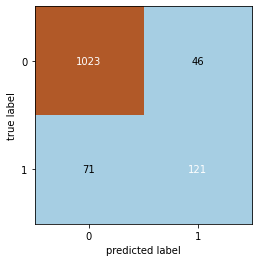

In [ ]:
#CONSTRUCT DEFAULT DECISION TREE AND OBTAIN RESPECTIVE ACCURACY ==================
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf_predict=clf.predict(X_test)

models_metrics.append(["DT", accuracy_score(y_test,clf_predict), f1_score(y_test,clf_predict),roc_auc_score(y_test,clf_predict), recall_score(y_test,clf_predict), precision_score(y_test,clf_predict)])
print("Accuracy score (test): {0:.6f}".format(clf.score(X_test,y_test)))
print("All Accuracy Scores")
print("Confusion Matrix:")
print(confusion_matrix( y_test,clf_predict))
print("Classification Report")
print(classification_report(y_test, clf_predict))
print("AUC_Score-", roc_auc_score(y_test, clf_predict))
print('\n')
print('\n')

plot_confusion_matrix(confusion_matrix(y_test,clf_predict), cmap='Paired')

Accuracy score (test): 0.865979
All Accuracy Scores
Confusion Matrix:
[[1048   21]
 [ 148   44]]
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1069
           1       0.68      0.23      0.34       192

    accuracy                           0.87      1261
   macro avg       0.78      0.60      0.63      1261
weighted avg       0.85      0.87      0.84      1261

AUC_Score- 0.6047610695353913






(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff72a9b5470>)

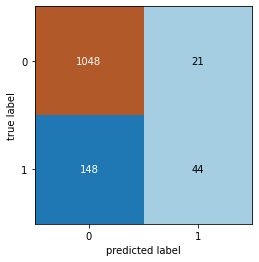

In [ ]:
#CONSTRUCT DEFAULT Multi Layer Perceptron AND OBTAIN RESPECTIVE ACCURACY ==================
clf = MLPClassifier()
clf.fit(X_train, y_train)
clf_predict=clf.predict(X_test)

models_metrics.append(["MLP", accuracy_score(y_test,clf_predict), f1_score(y_test,clf_predict),roc_auc_score(y_test,clf_predict), recall_score(y_test,clf_predict), precision_score(y_test,clf_predict)])
print("Accuracy score (test): {0:.6f}".format(clf.score(X_test,y_test)))
print("All Accuracy Scores")
print("Confusion Matrix:")
print(confusion_matrix( y_test,clf_predict))
print("Classification Report")
print(classification_report(y_test, clf_predict))
print("AUC_Score-", roc_auc_score(y_test, clf_predict))
print('\n')
print('\n')

plot_confusion_matrix(confusion_matrix(y_test,clf_predict), cmap='Paired')

Accuracy score (test): 0.911975
All Accuracy Scores
Confusion Matrix:
[[1068    1]
 [ 110   82]]
Classification Report
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1069
           1       0.99      0.43      0.60       192

    accuracy                           0.91      1261
   macro avg       0.95      0.71      0.77      1261
weighted avg       0.92      0.91      0.90      1261

AUC_Score- 0.7130739398191456






(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff72dd834e0>)

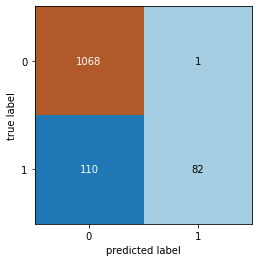

In [ ]:
#CONSTRUCT DEFAULT RANDOM FOREST CLASSIFIER AND OBTAIN RESPECTIVE ACCURACY ==================
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf_predict=clf.predict(X_test)

models_metrics.append(["RF", accuracy_score(y_test,clf_predict), f1_score(y_test,clf_predict),roc_auc_score(y_test,clf_predict), recall_score(y_test,clf_predict), precision_score(y_test,clf_predict)])
print("Accuracy score (test): {0:.6f}".format(clf.score(X_test,y_test)))
print("All Accuracy Scores")
print("Confusion Matrix:")
print(confusion_matrix( y_test,clf_predict))
print("Classification Report")
print(classification_report(y_test, clf_predict))
print("AUC_Score-", roc_auc_score(y_test, clf_predict))
print('\n')
print('\n')

plot_confusion_matrix(confusion_matrix(y_test,clf_predict), cmap='Paired')

Accuracy score (test): 0.927042
All Accuracy Scores
Confusion Matrix:
[[1056   13]
 [  79  113]]
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1069
           1       0.90      0.59      0.71       192

    accuracy                           0.93      1261
   macro avg       0.91      0.79      0.83      1261
weighted avg       0.93      0.93      0.92      1261

AUC_Score- 0.7881903843155597






(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff72dd677b8>)

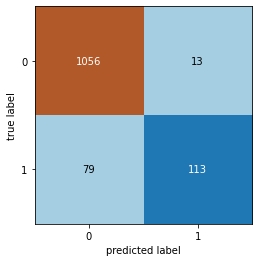

In [ ]:
#CONSTRUCT DEFAULT GRADIENT BOOSTING CLASSIFIER AND OBTAIN RESPECTIVE ACCURACY ==================

clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
clf_predict=clf.predict(X_test)

models_metrics.append(["GB", accuracy_score(y_test,clf_predict), f1_score(y_test,clf_predict),roc_auc_score(y_test,clf_predict), recall_score(y_test,clf_predict), precision_score(y_test,clf_predict)])
print("Accuracy score (test): {0:.6f}".format(clf.score(X_test,y_test)))
print("All Accuracy Scores")
print("Confusion Matrix:")
print(confusion_matrix( y_test,clf_predict))
print("Classification Report")
print(classification_report(y_test, clf_predict))
print("AUC_Score-", roc_auc_score(y_test, clf_predict))
print('\n')
print('\n')

plot_confusion_matrix(confusion_matrix(y_test,clf_predict), cmap='Paired')

In [ ]:
#STACKING MODELS =====================================================================
print("___________________________________________________________________________________________\nEnsemble Methods Predictions using GradientBoosting, KNeighborsClassifier, LogisticRegression RandomForest and Decision Tree Classifier\n")

models = [ RandomForestClassifier(), DecisionTreeClassifier(), GradientBoostingClassifier(), MLPClassifier(), LogisticRegression()]
      
S_Train, S_Test = stacking(models,                   
                           X_train, y_train, X_test,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=4, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

___________________________________________________________________________________________
Ensemble Methods Predictions using GradientBoosting, KNeighborsClassifier, LogisticRegression RandomForest and Decision Tree Classifier

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [5]

model  0:     [RandomForestClassifier]
    fold  0:  [0.91780822]
    fold  1:  [0.93127148]
    fold  2:  [0.92783505]
    fold  3:  [0.90378007]
    ----
    MEAN:     [0.92017370] + [0.01067946]
    FULL:     [0.92017167]

model  1:     [DecisionTreeClassifier]
    fold  0:  [0.85616438]
    fold  1:  [0.91065292]
    fold  2:  [0.93127148]
    fold  3:  [0.88659794]
    ----
    MEAN:     [0.89617168] + [0.02799081]
    FULL:     [0.89613734]

model  2:     [GradientBoostingClassifier]
    fold  0:  [0.92465753]
    fold  1:  [0.92783505]
    fold  2:  [0.92783505]
    fold  3:  [0.91065292]
    ----
    MEAN:     [0.92274514] + [0

All Accuracy Scores
accuracy Score for Decision Tree:0.922284
Confusion Matrix:
[[1067    2]
 [  96   96]]
Classification Report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1069
           1       0.98      0.50      0.66       192

    accuracy                           0.92      1261
   macro avg       0.95      0.75      0.81      1261
weighted avg       0.93      0.92      0.91      1261

AUC_Score- 0.7490645463049579






(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff72a6c4eb8>)

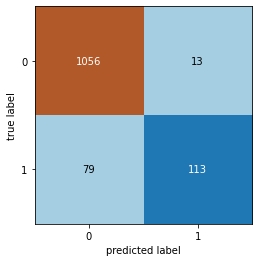

In [ ]:
#STACKING - CONTRUCT A RANDOM FOREST MODEL==============================
model = RandomForestClassifier()
    
model = model.fit(S_Train, y_train)
y_pred = model.predict(S_Test)

models_metrics.append(["Stacked", accuracy_score(y_test,y_pred), f1_score(y_test,y_pred),roc_auc_score(y_test,y_pred), recall_score(y_test,y_pred), precision_score(y_test,y_pred)])
print("All Accuracy Scores")
print("accuracy Score for Decision Tree:{0:6f}".format(accuracy_score(y_test,y_pred)))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report")
print(classification_report(y_test,y_pred))
print("AUC_Score-", roc_auc_score(y_test,y_pred))
print('\n')
print('\n')

plot_confusion_matrix(confusion_matrix(y_test,clf_predict), cmap='Paired')

{'n_estimators': 40, 'min_samples_leaf': 20, 'max_depth': 7}
All Accuracy Scores
accuracy Score for Decision Tree:0.920698
Confusion Matrix:
[[1068    1]
 [  99   93]]
Classification Report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1069
           1       0.99      0.48      0.65       192

    accuracy                           0.92      1261
   macro avg       0.95      0.74      0.80      1261
weighted avg       0.93      0.92      0.91      1261

AUC_Score- 0.7417197731524788






(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff72a6c8860>)

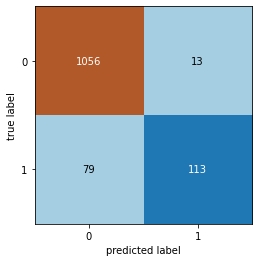

In [ ]:
#STACKING - CONTRUCT A RANDOM FOREST MODEL==============================

rf=RandomForestClassifier()
rand_parameters={'min_samples_leaf' : range(10,100,10),'max_depth': 
            range(1,10,2),'n_estimators':[20,30,40]}
rf_random = RandomizedSearchCV(rf,rand_parameters,n_iter=25,cv=5)
model = rf_random.fit(S_Train, y_train)
y_pred = model.predict(S_Test)
grid_parm=rf_random.best_params_
print(grid_parm)

models_metrics.append(["Stacked_hpt", accuracy_score(y_test,y_pred), f1_score(y_test,y_pred),roc_auc_score(y_test,y_pred), recall_score(y_test,y_pred), precision_score(y_test,y_pred)])
print("All Accuracy Scores")
print("accuracy Score for Decision Tree:{0:6f}".format(accuracy_score(y_test,y_pred)))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report")
print(classification_report(y_test,y_pred))
print("AUC_Score-", roc_auc_score(y_test,y_pred))
print('\n')
print('\n')

plot_confusion_matrix(confusion_matrix(y_test,clf_predict), cmap='Paired')

In [ ]:
print(models_metrics)
pd.DataFrame(models_metrics, columns=['Classifiers','accuracy_score', 'f1_score','roc_auc_score', 'recall_score', 'precision_score'])

[['DT', 0.9072164948453608, 0.6740947075208914, 0.7935887316806985, 0.6302083333333334, 0.7245508982035929], ['MLP', 0.865979381443299, 0.3424124513618677, 0.6047610695353913, 0.22916666666666666, 0.676923076923077], ['RF', 0.9119746233148295, 0.5963636363636363, 0.7130739398191456, 0.4270833333333333, 0.9879518072289156], ['GB', 0.9270420301348137, 0.710691823899371, 0.7881903843155597, 0.5885416666666666, 0.8968253968253969], ['Stacked', 0.922283901665345, 0.6620689655172414, 0.7490645463049579, 0.5, 0.9795918367346939], ['Stacked_hpt', 0.9206978588421887, 0.6503496503496503, 0.7417197731524788, 0.484375, 0.9893617021276596]]


,Classifiers,accuracy_score,f1_score,roc_auc_score,recall_score,precision_score
0,DT,0.907216,0.674095,0.793589,0.630208,0.724551
1,MLP,0.865979,0.342412,0.604761,0.229167,0.676923
2,RF,0.911975,0.596364,0.713074,0.427083,0.987952
3,GB,0.927042,0.710692,0.788190,0.588542,0.896825
4,Stacked,0.922284,0.662069,0.749065,0.500000,0.979592
5,Stacked_hpt,0.920698,0.650350,0.741720,0.484375,0.989362
